In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/tested.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
# Checking missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [9]:
df.drop("Cabin",axis=1,inplace=True)

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
# Value counts for important columns
print(df['Survived'].value_counts())
print(df['Pclass'].value_counts())
print(df['Sex'].value_counts())
print(df['Embarked'].value_counts())

Survived
0    204
1    127
Name: count, dtype: int64
Pclass
3    145
1     98
2     88
Name: count, dtype: int64
Sex
male      204
female    127
Name: count, dtype: int64
Embarked
S    227
C     82
Q     22
Name: count, dtype: int64


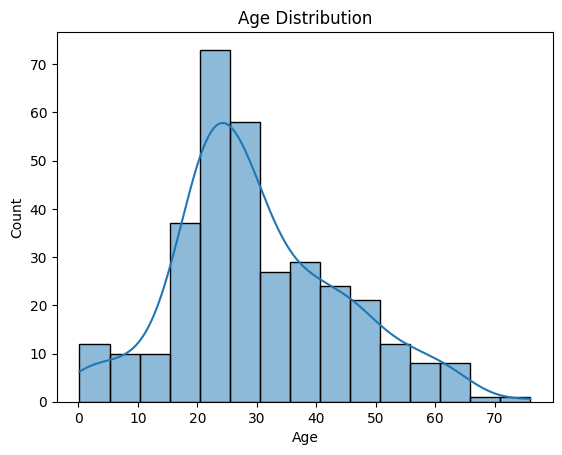

In [13]:
#Univariate Analysis
# Age distribution
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

The age distribution of Titanic passengers is **right-skewed**, with most individuals aged between **20 and 40 years**.
A smaller number of children (ages 0–10) and elderly passengers (above 60) are also present.
The Kernel Density Estimate (KDE) curve shows a peak around the mid-20s, indicating that **young adults were the most common age group onboard.**


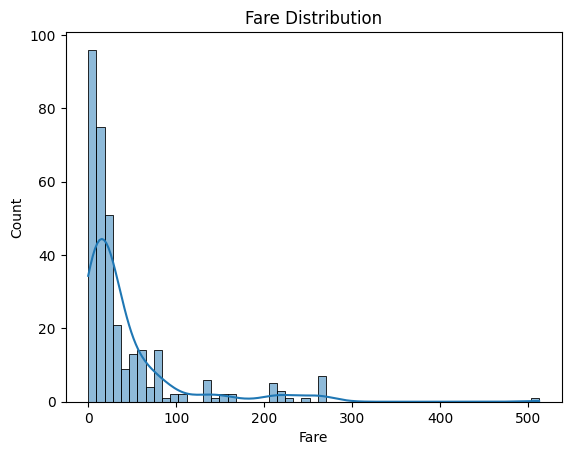

In [14]:
# Fare distribution
sns.histplot(df['Fare'].dropna(), kde=True)
plt.title('Fare Distribution')
plt.show()

The Fare distribution is highly **right-skewed**, with the majority of fares clustered** below 50 units.**
A few passengers paid exceptionally high fares (above 200), which represent outliers.
The KDE curve shows that most passengers traveled in lower fare classes, indicating that **lower-class tickets were more common among passengers**.

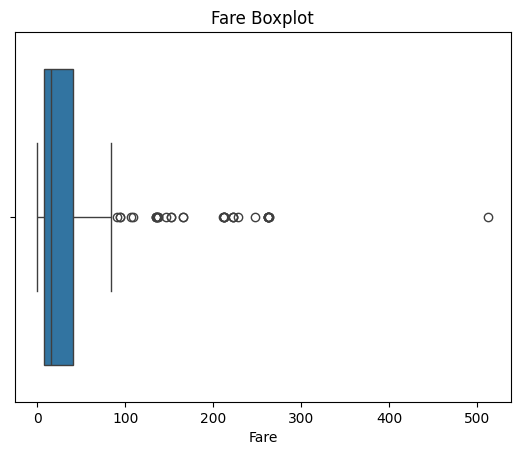

In [15]:
# Fare Boxplot
sns.boxplot(x=df['Fare'])
plt.title('Fare Boxplot')
plt.show()

The boxplot shows that the majority of fares are relatively low, with a long tail of high-fare outliers.
There are several extreme values above 200, which likely correspond to first-class luxury passengers.
This skewness suggests that while most passengers traveled affordably, a small portion paid premium fares for better accommodations.

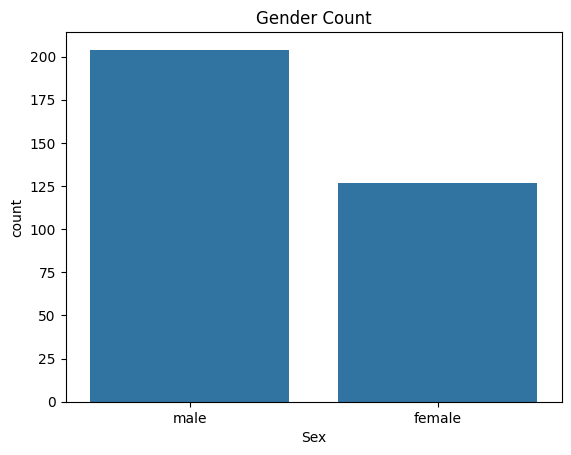

In [16]:
# Sex Countplot
sns.countplot(x='Sex', data=df)
plt.title('Gender Count')
plt.show()

The countplot reveals that there were **more male passengers than female passengers** onboard the Titanic.
Understanding this gender distribution is important, as survival rates differ significantly between men and women.

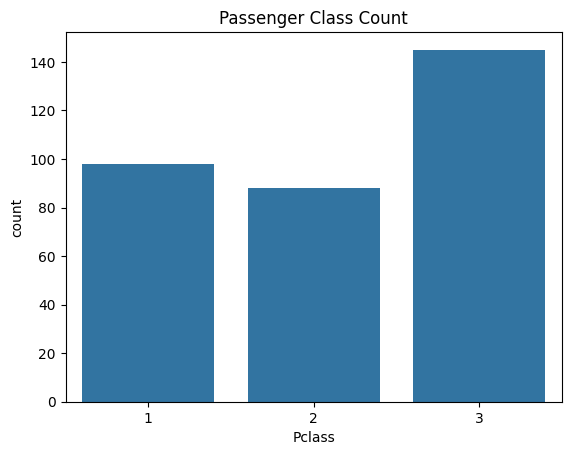

In [17]:
# Pclass Countplot
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Count')
plt.show()

Most passengers belonged to the **third class**, **followed by the first and second classes.**
This class distribution reflects that the **Titanic was carrying many economy-class travelers,** likely immigrants or lower-income passengers, in addition to wealthy individuals.

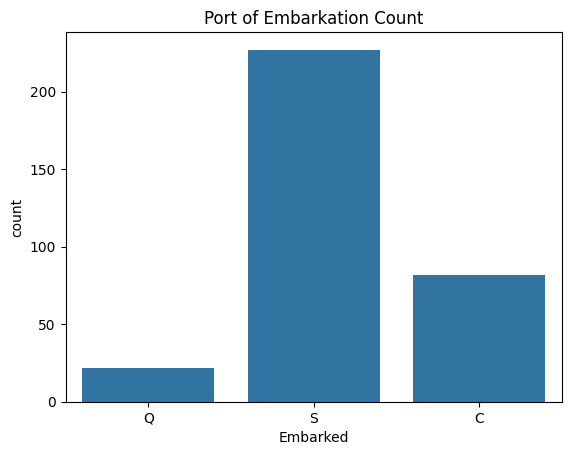

In [18]:
# Embarked Countplot
sns.countplot(x='Embarked', data=df)
plt.title('Port of Embarkation Count')
plt.show()

The majority of passengers embarked from Southampton (S), with smaller numbers from Cherbourg (C) and Queenstown (Q).
This suggests Southampton was the main boarding location for the Titanic, and could influence demographic and survival trends.

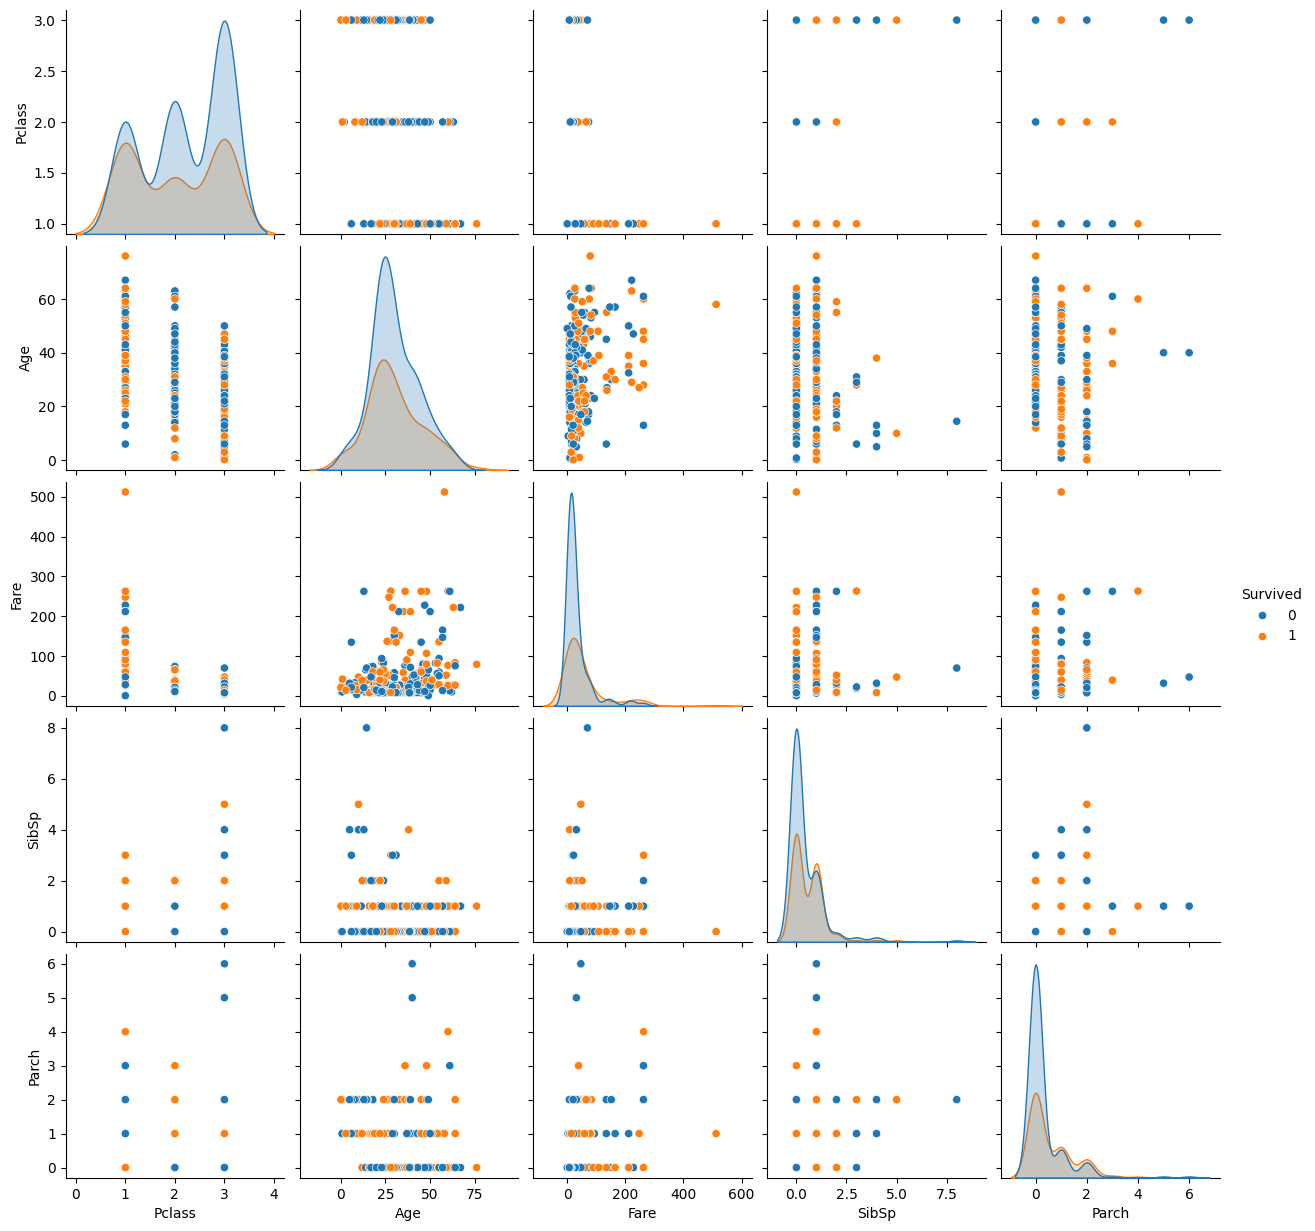

In [19]:
# Pairplot
sns.pairplot(df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']].dropna(), hue='Survived')
plt.show()

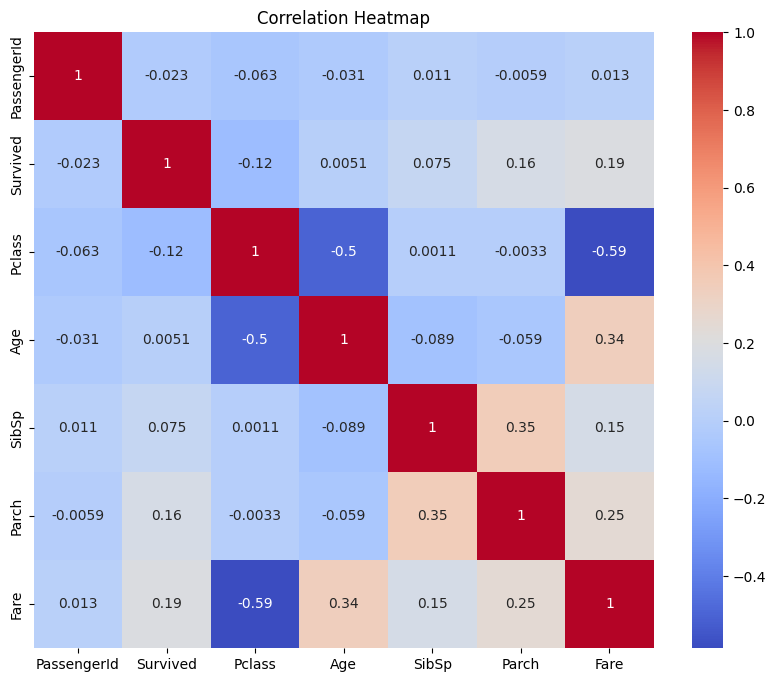

In [21]:
# Correlation Heatmap
# Correlation Heatmap
plt.figure(figsize=(10,8))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


The correlation heatmap reveals several important relationships among the numerical features:

Fare shows a moderate positive correlation with Pclass (negatively, because lower class numbers mean higher class).

Survived has a weak negative correlation with Pclass, meaning passengers in lower-numbered classes (1st class) were more likely to survive.

SibSp (siblings/spouses aboard) and Parch (parents/children aboard) show a slight positive correlation, indicating that passengers traveling with family tended to have related family members.

Overall, correlations with Survived are relatively weak, suggesting that multiple factors combined (not just one variable) influenced survival.